<a href="https://colab.research.google.com/github/jerge/DAT405-DSC/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mounting a google drive folder so data can be read
#NOTE, if you have the datasets locally there is no need to run this cell
from google.colab import drive
drive.mount('/content/drive')

# [DAT405 Assignment 1](https://chalmers.instructure.com/courses/10918/files/883283/download?wrap=1), Group 13
* Daniel Willim: X h
* Erik Jergéus: X h

# 1. Download Some Data Related to GDP per capita and life expectancy

###  a. Write a Python program that draws a scatter plot of GDP per capita vs life expectancy. State any assumptions and motivate decisions that you make when selecting data to be plotted, and in combining data. 
We gathered data from 3 different datasets from [Our world in data](https://ourworldindata.org/), these were: [GDP per Captia in US $](https://ourworldindata.org/grapher/gdp-per-capita-worldbank?tab=table), [National GDP in US \$](https://ourworldindata.org/grapher/national-gdp?tab=table) and [Life expectency at birth](https://ourworldindata.org/grapher/life-expectancy?tab=table&region=World).

We decided to compare data from countries around the world from one specific year, 2015, since the change from year to year in one country will not be that significant and having several datapoints from one country would clutter the plots a lot and make it hard to compare different countries to each other. 

We choose 2015 since this it is relatively close to today and we had a lot of datapoints in all our datasets from this year ensuring that we can compare more countries. 

We also assumed that in our datasets for GDP per Capita and GDP, the GDP were calculated in the same way so we can compare the different numbers.

Since there is a logarithmic relationship between GDP (and GDP per capita) and life expectancy we will use a logarithmic x axis to get a better picture in all following plots, except the first one so you get a picture of why we use a logarithmic x-axis. Labels for each country will not be plotted since this would clutter the figures to much.

*In the report we will use life expectency and life expectency at birth interchangably when we mean life expectency at birth*

*In bellow code block we will read our data and do a scatterplot of GDP per capita against Life expectancy*

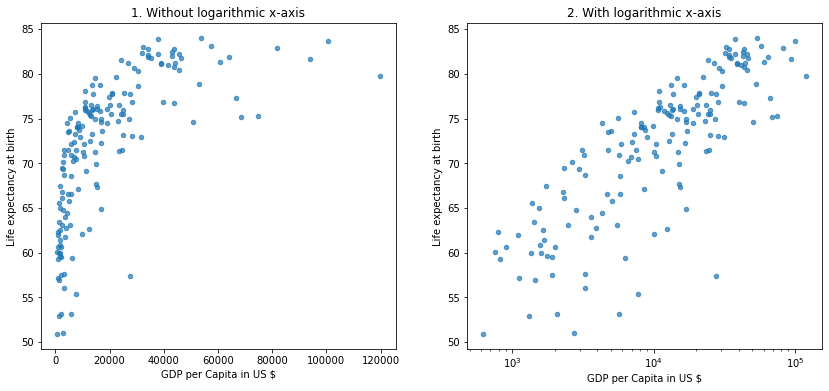

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

#Read data
GdpPerCap = pd.read_csv("gdp-per-capita-worldbank.csv")
LifeExpect = pd.read_csv("life-expectancy.csv")
NatGdp = pd.read_csv("national-gdp.csv")

# Data merging & cleaning
countries = NatGdp.merge(GdpPerCap).merge(LifeExpect).set_index("Code")
countries = countries[countries.Year == 2015]
countries.columns= ["country","year","gdp","gdp_capita", "life_exp"]

#Floats will be displayed with atmost 2 decimals
pd.set_option('float_format', '{:.2f}'.format)

#Plotting
plt.rcParams['figure.figsize'] = [2*7, 1*6] #Resize figure to allow 2 subplots in x 
fig, (ax1,ax2) = plt.subplots(1,2)
countries.plot.scatter(x="gdp_capita",y="life_exp", alpha=0.7, ax=ax1)
countries.plot.scatter(x="gdp_capita",y="life_exp",logx=True, alpha=0.7, ax=ax2)

plt.rcParams['figure.figsize'] = [7, 6] #Resize figure to 1 subplot

#Configure plot
ax1.set_xlabel("GDP per Capita in US $")
ax1.set_ylabel("Life expectancy at birth")
ax1.set_title("1. Without logarithmic x-axis")
ax2.set_xlabel("GDP per Capita in US $")
ax2.set_ylabel("Life expectancy at birth")
ax2.set_title("2. With logarithmic x-axis")
plt.show()

### b. Consider whether the results obtained seem reasonable and discuss what might be the explanation for the results you obtained.


The figures show that a country with higher GDP per Capita will have a higher life expectancy but the relation between GDP per Capita and Life expectancy is not linear instead it’s a logarithmic relation, as discussed I question a. 

Which is a reasonable result since a country with high GDP per capita will produce more money per citizen and therefor have more money to spend on improving infrastructure such as public healthcare which in turn will contribute to higher life expectancy. But households in countries with higher GDP per capita will usually have more disposable income such that they can provide for all their basic needs further improving their health. 

As in all real cases there is no perfect correlation between the two parameters, and we see that there are some outliers in the data. Bellow we have listed the three countries with the highest GDP per capita and the three with the highest life expectancy. For example, we see that Hong Kong have a GDP per Capita that is more half that of Qatar. This could be that case since Qatar is an oil-country that relatively recently found oil and before that were a rather poor country. Therefor the wealth generated from this have not spread equally throughout the society, only creating a super wealthy upper class. Also, since the boost to the economy went rather fast, good public healthcare and other public health improving infrastructure have not yet had their full effect.  

In [3]:
#Sort by GDP per Capita and take only the first three entries
countries.sort_values(by="gdp_capita", ascending=False)[0:3]

,country,year,gdp,gdp_capita,life_exp
Code,,,,,
QAT,Qatar,2015,245526462464,119749.43,79.76
MAC,Macao,2015,52461273088,100444.59,83.71
LUX,Luxembourg,2015,39506448384,94088.59,81.64


In [4]:
#Sort by life expectancy and take only the first three entries
countries.sort_values(by="life_exp", ascending=False)[0:3]

,country,year,gdp,gdp_capita,life_exp
Code,,,,,
HKG,Hong Kong,2015,288184369152,53591.84,84.04
JPN,Japan,2015,4975034892288,37882.98,83.88
MAC,Macao,2015,52461273088,100444.59,83.71


### c. Data Cleaning and Why?
Yes we did, firstly we only used data from 2015 which we talked about in question 1a. We also removed all countries that did not have datapoints for 2015 in all three datasets since we if a country is in one comparison it should be considered during all other comparisons in order to not have misleading comparisons. In our datasets there were also some "average-entries" for different regions around the world like "World" or "Africa" these were removed since they might be mistaken as regular countries and therefor confuse the reader. 

*All cleaning we're done with the `dataframe.merge()` function since this removes entries which don't have data in all columns (for example the "average-entries" did not have a country code and were therefor removed.*

### d. Which countries have a life expectancy higher than one standard deviation above the mean?
In the figure bellow we've plotted all countires that have a life expectancy higher than one standard deviation above the mean (~80.05 years) in green, all countries are also listed in the table bellow that.

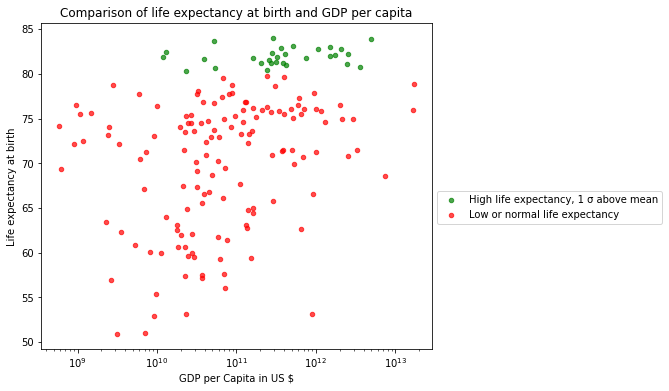

,country,year,gdp,gdp_capita,life_exp
Code,,,,,
AUS,Australia,2015,1066969268224,43923.26,82.79
AUT,Austria,2015,387296296960,44304.97,81.18
BEL,Belgium,2015,417381416960,41708.21,80.97
CAN,Canada,2015,1518240006144,43149.48,82.03
CYP,Cyprus,2015,23035398144,30549.10,80.35
DNK,Denmark,2015,243726254080,45458.70,80.47
FIN,Finland,2015,206622720000,38941.76,81.20
FRA,France,2015,2520561483776,37766.37,82.22
DEU,Germany,2015,3634567053312,43937.95,80.77


In [9]:
#Calculate standard deviation and mean for all columns in dataframe 
stdevs = countries.std(axis = 0)
means = countries.mean(axis = 0)

#Divide entries according to life expectency
highLifeExp = countries[countries.life_exp > stdevs.life_exp + means.life_exp]
lowLifeExp = countries[countries.life_exp <= stdevs.life_exp + means.life_exp]

#Prepare plots
fig, ax = plt.subplots()
highLifeExp.plot.scatter(x="gdp",y="life_exp", alpha=0.7,
                         logx=True, ax=ax, color='g', label="High life expectancy, 1 σ above mean")
lowLifeExp.plot.scatter(x="gdp",y="life_exp",alpha=0.7,
                        logx=True, ax=ax, color='r', label="Low or normal life expectancy")

#Configure plots
plt.legend(bbox_to_anchor=(1, 0.5))
ax.set_xlabel("GDP per Capita in US $")
ax.set_ylabel("Life expectancy at birth")
plt.title("Comparison of life expectancy at birth and GDP per capita")

plt.show()

#Print table with all countries that have a life expectancy higher than one standard deviation above the mean
highLifeExp

### e. Which countries have high life expectancy but have low GDP?
In the table below we see that GDP per capita have a higher standard deviation than mean, this is because exponential growth of GDP per capita between different countries. We therefore choose to define **high life expectancy** as a country that was above the 75th percentile and **low GDP** as a country that were below the 25th percentile. 

In [12]:
#Print info about the dataframes different columns
countries.describe()

,year,gdp,gdp_capita,life_exp
count,169.00,169.00,169.00,169.00
mean,2015.00,611187882521.75,19302.84,72.02
std,0.00,2013398558732.89,20548.16,8.03
min,2015.00,579270912.00,621.57,50.88
25%,2015.00,23122962432.00,4713.50,66.58
50%,2015.00,72440545280.00,12759.82,74.08
75%,2015.00,380653502464.00,27045.71,77.69
max,2015.00,17126858424320.00,119749.43,84.04


With this defintion there were 4 countries that had high life expectancy but low GDP. These were: Barbados, Cyprus, Iceland and Malta and are marked in blue in the figure and listed in a table below the figure.

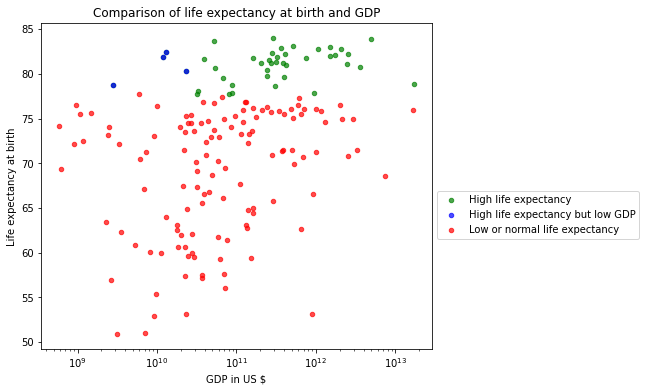

,country,year,gdp,gdp_capita,life_exp
Code,,,,,
BRB,Barbados,2015,2807180544,16458.10,78.80
CYP,Cyprus,2015,23035398144,30549.10,80.35
ISL,Iceland,2015,13045315584,43048.13,82.48
MLT,Malta,2015,11749704704,34087.08,81.90


In [21]:
fig, ax = plt.subplots()

#Divide data according to question paramaters
highLifeExp = countries[countries.life_exp > countries.life_exp.quantile(0.75)]
lowLifeExp = countries[countries.life_exp <= countries.life_exp.quantile(0.75)]
highLifeExpLowGDP = highLifeExp[highLifeExp.gdp < countries.gdp.quantile(0.25)]

#Plot data
highLifeExp.plot.scatter(x="gdp",y="life_exp", alpha=0.7, 
                         logx=True,ax=ax, color='g', label="High life expectancy")
highLifeExpLowGDP.plot.scatter(x="gdp",y="life_exp",alpha=0.7, 
                               logx=True,ax=ax, color='b', label="High life expectancy but low GDP")
lowLifeExp.plot.scatter(x="gdp",y="life_exp",alpha=0.7, 
                        logx=True,ax=ax, color='r',label="Low or normal life expectancy")

#Configure plots
plt.legend(bbox_to_anchor=(1, 0.5))
ax.set_xlabel("GDP in US $")
ax.set_ylabel("Life expectancy at birth")
plt.title("Comparison of life expectancy at birth and GDP")

plt.show()

#Print table of countries with high life expectancy and low GDP
highLifeExpLowGDP

# f. Does every strong economy (normally indicated by GDP) have high life expectancy? 
No, from the plot we can see that there are no correlation between GDP and life expectancy, hence we cannot conclude that every strong economy have high life expectancy. We've marked all countries that have high GDP but don't have high life expectancy in yellow. 

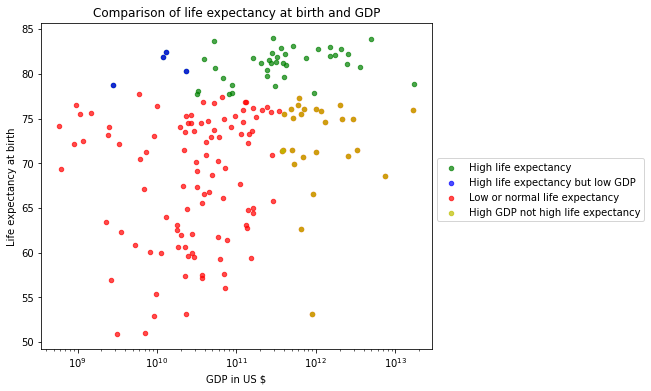

In [22]:
#Prepare plotting
fig, ax = plt.subplots()

#Create a group with countries who have high GDP but don't have high life expectany 
lowLifeExpHighGDP = lowLifeExp[lowLifeExp.gdp >= countries.gdp.quantile(0.75)]

#Plot data
highLifeExp.plot.scatter(x="gdp",y="life_exp", alpha=0.7, 
                         logx=True,ax=ax, color='g',label="High life expectancy")
highLifeExpLowGDP.plot.scatter(x="gdp",y="life_exp",alpha=0.7, 
                               logx=True,ax=ax, color='b',label="High life expectancy but low GDP")
lowLifeExp.plot.scatter(x="gdp",y="life_exp",alpha=0.7, 
                        logx=True,ax=ax, color='r',label="Low or normal life expectancy")
lowLifeExpHighGDP.plot.scatter(x="gdp",y="life_exp",alpha=0.7, 
                               logx=True,ax=ax, color='y', label="High GDP, not high life expectancy")

#Configure plots
plt.legend(bbox_to_anchor=(1, 0.6))
ax.set_xlabel("GDP in US $")
ax.set_ylabel("Life expectancy at birth")
plt.title("Comparison of life expectancy at birth and GDP")

plt.show()

### g. Related to question f, what would happen if you use GDP per capita as an indicator of strong economy? Explain the results you obtained, and discuss any insights you get from comparing the results of g and f

In [31]:
#Check if any countries match the critera of high life expectancy but low GDP per Capita
highLifeExpLowGDPcap = highLifeExp[highLifeExp.gdp_capita < countries.gdp_capita.quantile(0.25)]
print(f"There are {highLifeExpLowGDPcap.country.count()} countries in the dataframe highLifeExpLowGDPcap")

There are 0 countries in the dataframe highLifeExpLowGDPcap


With this new definition we see that no countries fit the criteria that they should have a strong economy but low life expectancy which fits with the discussion in question 1b.

In the figure below we have plotted GDP per capita against life expectancy again and each country have the same colour as in the previous figure. In this plot we see that the countries that had high GDP but not high life expectancy (yellow countries in the figure) are mixed in with the countries that had low or normal life expectancy. The same is true for the countries that had high life expectancy but low GDP. 

This is the case since GDP is an absolute number of how much goods a country produces during a year, hence a larger country will have more industries and more people working and will therefore have a larger GDP. And if we look at the 4 countries that had high life expectancy but low GDP we see that all are small island nation with relatively small populations but they have similar GDP per capita to other high life expectancy countries.

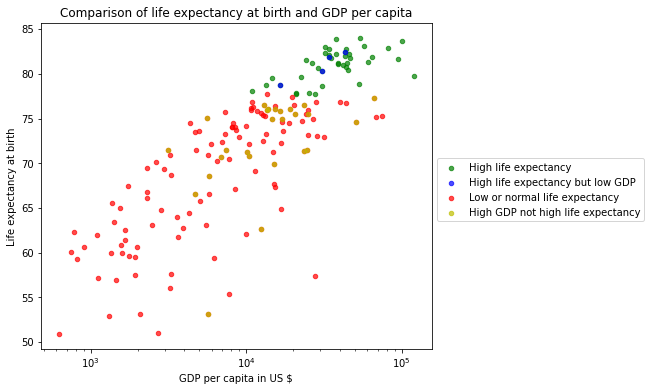

In [30]:
#Prepare plotting
fig, ax = plt.subplots()

#Plot data
highLifeExp.plot.scatter(x="gdp_capita",y="life_exp", alpha=0.7, 
                         logx=True,ax=ax, color='g',label="High life expectancy")
highLifeExpLowGDP.plot.scatter(x="gdp_capita",y="life_exp",alpha=0.7, 
                               logx=True,ax=ax, color='b',label="High life expectancy but low GDP")
lowLifeExp.plot.scatter(x="gdp_capita",y="life_exp",alpha=0.7, 
                        logx=True,ax=ax, color='r',label="Low or normal life expectancy")
lowLifeExpHighGDP.plot.scatter(x="gdp_capita",y="life_exp",alpha=0.7, 
                               logx=True,ax=ax, color='y', label="High GDP, not high life expectancy")

#Configure plots
plt.legend(bbox_to_anchor=(1, 0.6))
ax.set_xlabel("GDP per capita in US $")
ax.set_ylabel("Life expectancy at birth")
plt.title("Comparison of life expectancy at birth and GDP per capita")

plt.show()

# Download some other data sets, e.g. related to happiness and life satisfaction, trust, corruption, etc

### Think of several meaningful questions that can be answered with these data, make several informative visualisations to answer those questions. State any assumptions and motivate decisions that you make when selecting data to be plotted, and in combining data.

We chose to look at how big an impact a countries corruption and wealth impact life satisfaction.

First of all we wanted to check how money contributes to corruption, and one of the first things we thought of there was that the economic inequality probably was an indicator, since poorly distributed wealth should indicate that the country has less democracy, and furthermore we could see the relation between GDP per capita and economic inequality.

See if a country that had low economic inequality and corruption, will it be a happy country? Will the population be more satisfied with their lives? -> Life satisfaction.

“Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?


"Income equality and corruption?" Does one indicate the other? (top right corner)

"Corruption and income equality vs Life satisfaction?" Does a more just country indicate better lives for their citizens? (Bara för de bästa länderna)

"GDP per capita and equal income (RiP oljeländer) vs Life satisfaction" Does more money in a citizens life indicate a high life satisfaction

___________________________________________

Data manipulation, Skalor, Normalisera och adera *300, varför axlar . Varför -corruption

2012, 76 länder (income ineq har få länder)

In [ ]:
from sklearn import preprocessing

incomeInEq = pd.read_csv("/content/drive/My Drive/DAT405/economic-inequality-gini-index.csv")
corruption = pd.read_csv("/content/drive/My Drive/DAT405/TI-corruption-perception-index.csv")
gdpCap = pd.read_csv("/content/drive/My Drive/DAT405/gdp-per-capita-worldbank.csv")
satisfaction = pd.read_csv("/content/drive/My Drive/DAT405/happiness-cantril-ladder.csv")

# Merge, data cleaning, set index
countries = incomeInEq.merge(corruption).merge(gdpCap).merge(satisfaction).set_index("Code")
countries.columns= ["country","year","gini","corruption","gdp_capita","satisfaction"]

# Data cleaning, choose year 2012
countries = countries[countries.year == 2012]

# Normalize GDP per capita
min_max_scaler = preprocessing.MinMaxScaler()
x = countries[['gdp_capita']].values.astype(float)
x_scaled = min_max_scaler.fit_transform(x)
# Increase to more readable values
countries.gdp_capita = (x_scaled+0.01)*300
# Flip the corruption to have high corruption be to the right
countries.corruption = -countries.corruption

countries.plot.scatter(x="corruption", y="gini", s=countries.gdp_capita,c=countries.satisfaction,cmap="RdYlGn", alpha=0.8)

### Discuss any observations that you make, or insights obtained, from the data visualisations.

Svara på ovanstående frågor